In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.ticker as tick
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
raw_df = pd.read_excel('Loan_participants_data.xlsx',sheet_name='Sheet1')

In [3]:
raw_df

,Loan ID,cust_code,Current Loan Amount,Term,Credit Score,household_income,Years in current job,Home Ownership,Loan_type,Monthly Debt,Years of Credit History,Loan Status,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,c6e89899-6a0b-4280-b2a7-3ec3a9f2a067,1116075,555126,Long Term,718.0,91617.78,10+ years,Rent,Personal Loan,14922.79,16.5,Charged Off,NaN,NaN,NaN,NaN
1,3b70a557-7a93-418a-abe2-175e72ca6cf1,545252,444708,Short Term,744.0,62472.27,8 years,Home Mortgage,Personal Loan,28156.86,21.4,Fully Paid,NaN,NaN,NaN,NaN
2,621c8ce2-6ec0-483b-80d7-bd842a6a7930,1256252,246796,Short Term,732.0,39021.90,6 years,Home Mortgage,Home Loan,7213.35,21.6,Fully Paid,NaN,NaN,NaN,`
3,c7367260-3156-4277-bd1b-9ae0c14d440b,1541399,387640,Short Term,745.0,NaN,3 years,Rent,Personal Loan,17192.72,10.7,Fully Paid,NaN,NaN,NaN,NaN
4,962ddbcb-65d7-470c-8d8b-244b49cf1608,487927,481294,Short Term,743.0,197798.37,< 1 year,Rent,Personal Loan,8690.98,27.0,Fully Paid,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,7f420d7d-9308-4956-9bb4-d5660827a1c5,1400372,276254,Short Term,729.0,108253.62,10+ years,Rent,Personal Loan,36370.37,20.2,Fully Paid,NaN,NaN,NaN,NaN
69996,490d5bd1-6ee6-4db8-95b7-931fd7e0111d,1038280,136510,Short Term,716.0,80384.49,1 year,Home Mortgage,Personal Loan,6611.62,6.9,Charged Off,NaN,NaN,NaN,NaN
69997,9d57fa6d-fffc-455a-9e3e-adc2c5b515f2,1113722,267872,Short Term,NaN,89419.74,3 years,Home Mortgage,Personal Loan,15797.93,18.5,Charged Off,NaN,NaN,NaN,NaN
69998,0a4e3593-ec9e-4187-92bf-caaabbeb8304,595731,216942,Short Term,735.0,113305.86,10+ years,Own Home,other,11691.27,14.0,Charged Off,NaN,NaN,NaN,NaN


In [4]:
df = raw_df[['Loan ID', 'cust_code', 'Current Loan Amount', 'Term', 'Credit Score',
       'household_income', 'Years in current job', 'Home Ownership',
       'Loan_type', 'Monthly Debt', 'Years of Credit History', 'Loan Status']]

In [5]:
df.head(10)

,Loan ID,cust_code,Current Loan Amount,Term,Credit Score,household_income,Years in current job,Home Ownership,Loan_type,Monthly Debt,Years of Credit History,Loan Status
0,c6e89899-6a0b-4280-b2a7-3ec3a9f2a067,1116075,555126,Long Term,718.0,91617.78,10+ years,Rent,Personal Loan,14922.79,16.5,Charged Off
1,3b70a557-7a93-418a-abe2-175e72ca6cf1,545252,444708,Short Term,744.0,62472.27,8 years,Home Mortgage,Personal Loan,28156.86,21.4,Fully Paid
2,621c8ce2-6ec0-483b-80d7-bd842a6a7930,1256252,246796,Short Term,732.0,39021.90,6 years,Home Mortgage,Home Loan,7213.35,21.6,Fully Paid
3,c7367260-3156-4277-bd1b-9ae0c14d440b,1541399,387640,Short Term,745.0,NaN,3 years,Rent,Personal Loan,17192.72,10.7,Fully Paid
4,962ddbcb-65d7-470c-8d8b-244b49cf1608,487927,481294,Short Term,743.0,197798.37,< 1 year,Rent,Personal Loan,8690.98,27.0,Fully Paid
5,3eed99f3-73e5-4b7a-837f-d2a5a7dec15a,372579,522346,Short Term,NaN,73070.79,4 years,Home Mortgage,Personal Loan,41070.78,13.8,Fully Paid
6,3f394f21-78ee-440e-8f3b-002a06e67a81,548599,108834,Short Term,750.0,115668.93,10+ years,Home Mortgage,Personal Loan,11403.42,19.5,Fully Paid
7,8696f342-1635-471f-b95e-f5a17c71cd23,532357,265342,Short Term,750.0,63821.10,4 years,Home Mortgage,Personal Loan,13310.45,15.6,Fully Paid
8,4bfff84d-5e1a-4329-9962-f0cdd79ab2be,179686,173514,Long Term,706.0,58515.27,< 1 year,Rent,Personal Loan,5298.91,13.0,Fully Paid
9,7c89ad2c-4353-47ba-880e-3efc7629cbd7,1280223,134772,Short Term,720.0,119389.77,3 years,Rent,Personal Loan,5250.65,5.8,Fully Paid


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan ID                  70000 non-null  object 
 1   cust_code                70000 non-null  int64  
 2   Current Loan Amount      70000 non-null  int64  
 3   Term                     70000 non-null  object 
 4   Credit Score             56597 non-null  float64
 5   household_income         55712 non-null  float64
 6   Years in current job     66991 non-null  object 
 7   Home Ownership           70000 non-null  object 
 8   Loan_type                70000 non-null  object 
 9   Monthly Debt             70000 non-null  float64
 10  Years of Credit History  70000 non-null  float64
 11  Loan Status              70000 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 6.4+ MB


In [7]:
df['Loan Status'].value_counts()

Fully Paid     54173
Charged Off    15827
Name: Loan Status, dtype: int64

In [8]:
target = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [9]:
#missing values
df.isnull().sum()

Loan ID                        0
cust_code                      0
Current Loan Amount            0
Term                           0
Credit Score               13403
household_income           14288
Years in current job        3009
Home Ownership                 0
Loan_type                      0
Monthly Debt                   0
Years of Credit History        0
Loan Status                    0
dtype: int64

In [10]:
df['Credit Score'].mean()

716.2606145202043

In [11]:
df[df['household_income'].isnull()]

,Loan ID,cust_code,Current Loan Amount,Term,Credit Score,household_income,Years in current job,Home Ownership,Loan_type,Monthly Debt,Years of Credit History,Loan Status
3,c7367260-3156-4277-bd1b-9ae0c14d440b,1541399,387640,Short Term,745.0,NaN,3 years,Rent,Personal Loan,17192.72,10.7,Fully Paid
12,5d87b81c-4fff-44d5-9520-300e9d1d59db,1156799,151492,Short Term,744.0,NaN,5 years,Home Mortgage,Personal Loan,5996.40,11.1,Charged Off
13,414e1fdb-6efe-48f6-a966-49b68067d9f2,1171207,66924,Short Term,721.0,NaN,2 years,Rent,Personal Loan,20460.53,37.5,Fully Paid
14,3e016acf-5be3-470a-8e00-b301667799c3,1306436,150414,Short Term,745.0,NaN,3 years,Rent,Business Loan,6403.00,9.5,Fully Paid
19,3e916d05-dca1-4159-92f7-35d090da8abd,1302901,87032,Short Term,726.0,NaN,5 years,Home Mortgage,Personal Loan,14024.66,16.4,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...
69976,237a5a99-81e4-4e4b-8d68-dbca797bfb04,1506922,224884,Long Term,693.0,NaN,NaN,Rent,Personal Loan,9468.08,9.0,Fully Paid
69981,147accd0-970e-4dd6-a073-ea7bf6d14135,948177,219230,Short Term,736.0,NaN,3 years,Home Mortgage,other,22492.96,25.5,Fully Paid
69990,f83ef29d-e403-496f-bcae-dfd3acc1c68e,384878,375804,Short Term,680.0,NaN,8 years,Home Mortgage,Personal Loan,15190.88,13.9,Charged Off
69991,68ab73fb-56af-4e23-affc-d9d0123648f6,1458786,112332,Short Term,NaN,NaN,6 years,Home Mortgage,Personal Loan,43288.27,14.7,Fully Paid


In [12]:
df['EMI Percentage'] = round((df['Monthly Debt']/df['household_income'])*100,2)

<ipython-input-12-12c281f5b90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMI Percentage'] = round((df['Monthly Debt']/df['household_income'])*100,2)


In [13]:
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

<ipython-input-13-e12dabac28f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})


In [14]:
df['Term'] = df['Term'].map({'Long Term': 1, 'Short Term': 0})

<ipython-input-14-3ae3ac2a66f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Term'] = df['Term'].map({'Long Term': 1, 'Short Term': 0})


In [15]:
df['Years in current job'].value_counts()

10+ years    21725
2 years       6368
3 years       5789
< 1 year      5782
5 years       4762
1 year        4453
4 years       4300
6 years       3956
7 years       3859
8 years       3242
9 years       2755
Name: Years in current job, dtype: int64

In [16]:
df.head()

,Loan ID,cust_code,Current Loan Amount,Term,Credit Score,household_income,Years in current job,Home Ownership,Loan_type,Monthly Debt,Years of Credit History,Loan Status,EMI Percentage
0,c6e89899-6a0b-4280-b2a7-3ec3a9f2a067,1116075,555126,1,718.0,91617.78,10+ years,Rent,Personal Loan,14922.79,16.5,0,16.29
1,3b70a557-7a93-418a-abe2-175e72ca6cf1,545252,444708,0,744.0,62472.27,8 years,Home Mortgage,Personal Loan,28156.86,21.4,1,45.07
2,621c8ce2-6ec0-483b-80d7-bd842a6a7930,1256252,246796,0,732.0,39021.90,6 years,Home Mortgage,Home Loan,7213.35,21.6,1,18.49
3,c7367260-3156-4277-bd1b-9ae0c14d440b,1541399,387640,0,745.0,NaN,3 years,Rent,Personal Loan,17192.72,10.7,1,NaN
4,962ddbcb-65d7-470c-8d8b-244b49cf1608,487927,481294,0,743.0,197798.37,< 1 year,Rent,Personal Loan,8690.98,27.0,1,4.39


## Lets Analyse and Visualize the data

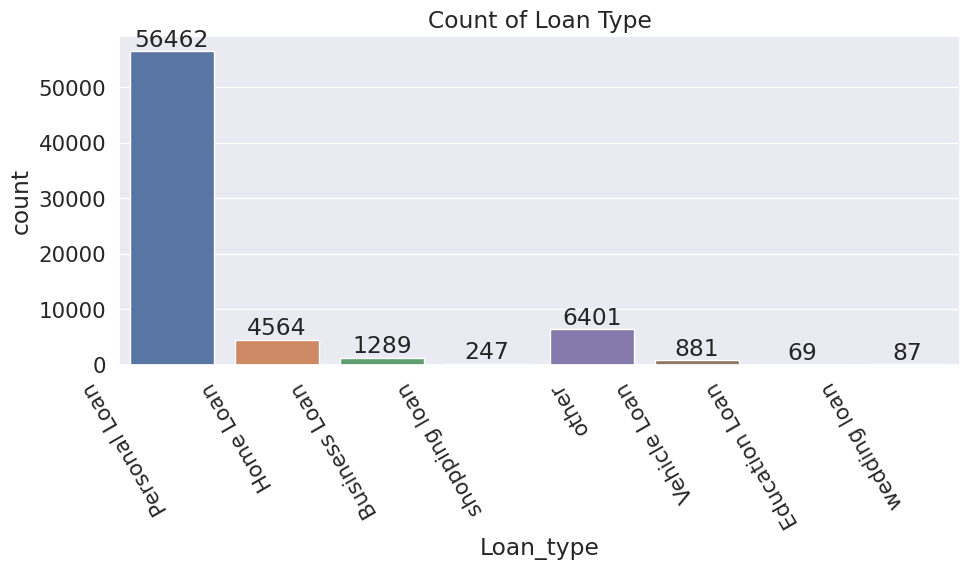

In [22]:
plt.title('Count of Loan Type')
ax = sns.countplot(x= df.Loan_type);

ax.set_xticklabels(ax.get_xticklabels(), rotation=120, ha="right")
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.show()

In [18]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)

    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")

    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]

    return new_tick_format

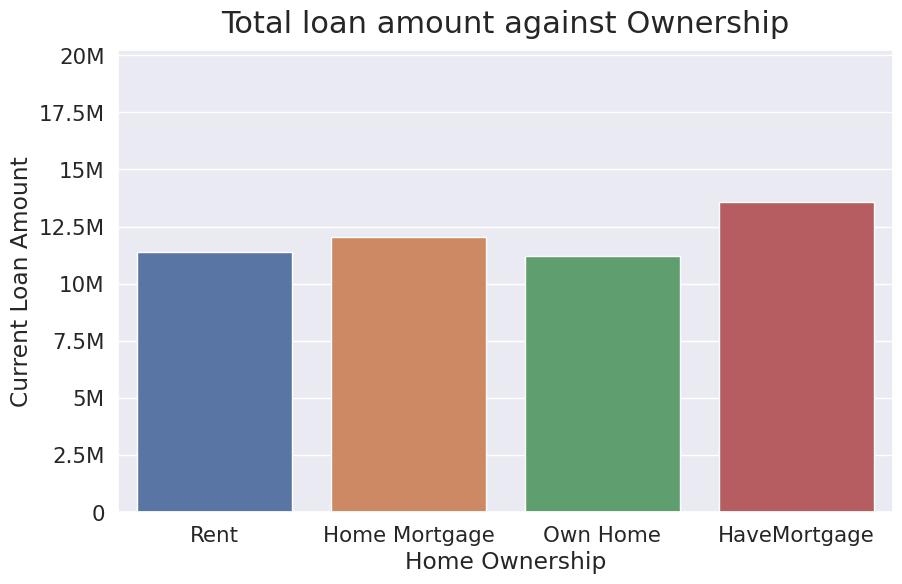

In [19]:
ax = sns.barplot(y = df['Current Loan Amount'],x=df['Home Ownership'],errwidth=0)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title("Total loan amount against Ownership", y=1.02, fontsize=22);

In [20]:
count = df['Years in current job'].value_counts()

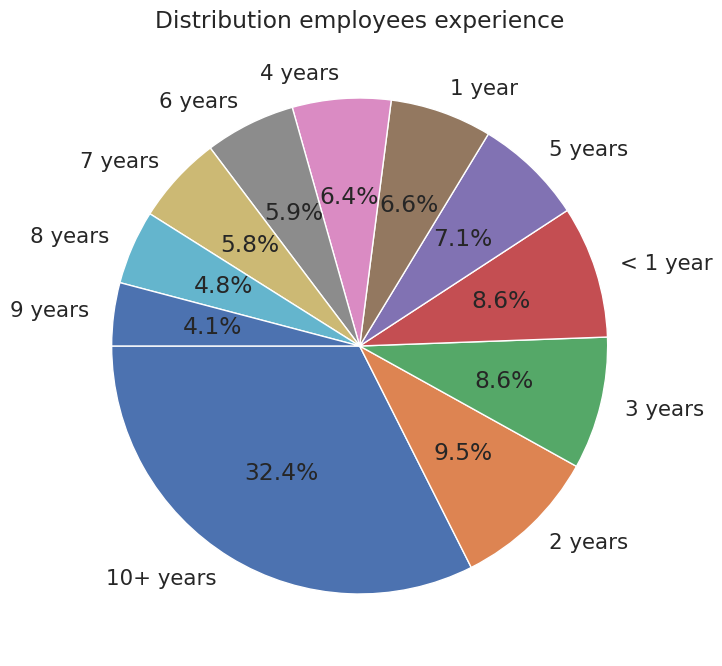

In [21]:
plt.figure(figsize=(8,10))
plt.title('Distribution employees experience')
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=180);

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

In [23]:
df.columns

Index(['Loan ID', 'cust_code', 'Current Loan Amount', 'Term', 'Credit Score',
       'household_income', 'Years in current job', 'Home Ownership',
       'Loan_type', 'Monthly Debt', 'Years of Credit History', 'Loan Status',
       'EMI Percentage'],
      dtype='object')

In [25]:
req_df = df[['Current Loan Amount', 'Term', 'Credit Score',
       'household_income', 'Years in current job', 'Home Ownership',
       'Loan_type', 'Monthly Debt', 'Years of Credit History',
       'EMI Percentage']]

In [27]:
train_df, test_df = req_df.randomSplit([0.7,0.3], seed=12)

AttributeError: ignored